# Project - Final

## Abstract/Introduction

Baltimore city is known to have a significant high crime rate that is considered above the national average. While I was exploring the data repository recorded by the Baltimore Police, I found the dataset from 2019 that represents the 911 Calls. As a graduate student who just finished learning the Machine Learning class, I collected that dataset to perform a classification modeling task. I run a logistic regression model that categorizes the emergency priority types of those calls from 2019. My baseline logistic regression classifier achieved an accuracy of 96 percent while predicting the 6 labels. If time would permit me, I would be able to fully complete the hyperparameters tuning along with search grid to find the best model suitable for this task.

## Exploratory data analysis

### Import libraries

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For handling Jupter Notebook python warnings
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
df = pd.read_csv('911_Calls_For_Service_2019.csv')

### Data observation

In [3]:
print(f'Rows: {df.shape[0]:,}')
print(f'Columns: {df.shape[1]:,}')

Rows: 1,455,168
Columns: 19


Our dataset has a lot observations, so we have enough number of rows to perform this classification tasks on a large dataset.

In [4]:
# Display 5 first observations contents to get the overview of dataset
df.head()

,objectid,recordid,callkey,calldatetime,priority,district,description,callnumber,incidentlocation,location,neighborhood,policedistrict,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,vrizones,zipcode
0,1,174699,1201020A5C2B06DF,2019/01/01 01:21:00+00,High,CD,RA POLICE,P190010250,0 S HOWARD ST,0 S HOWARD ST BALTIMORE MD,Downtown,Central,111.0,11.0,D7,Downtown/Seton Hill,Census Tract 401,NaN,21201.0
1,2,172354,1201020A5C2C080C,2019/01/01 19:38:00+00,Medium,CD,RA POLICE,P190012840,2500 EUTAW PL,2500 EUTAW PL BALTIMORE MD,Reservoir Hill,Central,133.0,7.0,D2,Penn North/Reservoir Hill,Census Tract 1301,NaN,21217.0
2,3,172330,1201020A5C2C0998,2019/01/01 19:45:00+00,Medium,CD,RA POLICE,P190012866,2500 EUTAW PL,2500 EUTAW PL BALTIMORE MD,Reservoir Hill,Central,133.0,7.0,D2,Penn North/Reservoir Hill,Census Tract 1301,NaN,21217.0
3,4,172142,1201020A5C2C1BEE,2019/01/01 21:03:00+00,Non-Emergency,NW,RECOVER PROPERTY,P190013069,3900 BARRINGTON RD,3900 BARRINGTON RD BALTIMORE MD,Dorchester,Northwestern,621.0,6.0,D1,Dorchester/Ashburton,Census Tract 1510,NaN,21207.0
4,5,172052,1201020A5C2C27DC,2019/01/01 21:54:00+00,Medium,NW,RA POLICE,P190013167,WABASH AV/ELDORADO AV,WABASH AV and ELDORADO AV BALTIMORE MD,Woodmere,Northwestern,623.0,6.0,D1,Howard Park/West Arlington,Census Tract 2801.02,NaN,21215.0


As shown above, the dataset has a mix of numerical and categorical features.

### Attributes types Identification

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455168 entries, 0 to 1455167
Data columns (total 19 columns):
objectid                       1455168 non-null int64
recordid                       1455168 non-null int64
callkey                        1455168 non-null object
calldatetime                   1455168 non-null object
priority                       1455162 non-null object
district                       1455168 non-null object
description                    1455168 non-null object
callnumber                     1455168 non-null object
incidentlocation               1455168 non-null object
location                       1455168 non-null object
neighborhood                   1431011 non-null object
policedistrict                 1431028 non-null object
policepost                     1431077 non-null float64
councildistrict                1431134 non-null float64
sheriffdistricts               1431097 non-null object
community_statistical_areas    1430478 non-null object
census_

## Data cleaning and feature engineering

### Handling missing values and repetitive data

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

objectid                             0
recordid                             0
callkey                              0
calldatetime                         0
priority                             6
district                             0
description                          0
callnumber                           0
incidentlocation                     0
location                             0
neighborhood                     24157
policedistrict                   24140
policepost                       24091
councildistrict                  24034
sheriffdistricts                 24071
community_statistical_areas      24690
census_tracts                    24138
vrizones                       1202120
zipcode                          24580
dtype: int64

In [8]:
df.isnull().sum().sum()

1396027

The above results show the number of missing values for each column, and the total number of empty data, so this clearly indicates that our dataset has plenty of missing data. Therefore, we can handle this by cleaning those unnecessary columns and keeping the ones useful for modeling.

 Let's remove 'vrizones' as it contains millions of missing values, and it is not useful for modeling.

In [9]:
df.drop('vrizones', axis=1, inplace=True)

Some other data are repetitive, like columns contents of 'incidentlocation' are similar to 'location'. We can remove 'location' and keep 'incidentlocation' in the dataset.

In [10]:
df.drop('location', axis=1, inplace=True)

Both 'district' and  'policedistrict' indicates the same thing as one has acronym of the other. We can keep 'district' and drop 'policedistrict' as it contains missing values. 

In [11]:
df.drop('policedistrict', axis=1, inplace=True)

The column 'census_tracts' has unwanted string part at the beginning that is repetitive for every row, so let's cut it and convert to numerical data.

In [12]:
df['census_tracts'] = df['census_tracts'].astype(str).str.lstrip('Census Tract ')

# Convert it to numerical data
df['census_tracts'] = pd.to_numeric(df['census_tracts'],errors='coerce')

# Take a look of the first five observations
df.head()

,objectid,recordid,callkey,calldatetime,priority,district,description,callnumber,incidentlocation,neighborhood,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,zipcode
0,1,174699,1201020A5C2B06DF,2019/01/01 01:21:00+00,High,CD,RA POLICE,P190010250,0 S HOWARD ST,Downtown,111.0,11.0,D7,Downtown/Seton Hill,401.00,21201.0
1,2,172354,1201020A5C2C080C,2019/01/01 19:38:00+00,Medium,CD,RA POLICE,P190012840,2500 EUTAW PL,Reservoir Hill,133.0,7.0,D2,Penn North/Reservoir Hill,1301.00,21217.0
2,3,172330,1201020A5C2C0998,2019/01/01 19:45:00+00,Medium,CD,RA POLICE,P190012866,2500 EUTAW PL,Reservoir Hill,133.0,7.0,D2,Penn North/Reservoir Hill,1301.00,21217.0
3,4,172142,1201020A5C2C1BEE,2019/01/01 21:03:00+00,Non-Emergency,NW,RECOVER PROPERTY,P190013069,3900 BARRINGTON RD,Dorchester,621.0,6.0,D1,Dorchester/Ashburton,1510.00,21207.0
4,5,172052,1201020A5C2C27DC,2019/01/01 21:54:00+00,Medium,NW,RA POLICE,P190013167,WABASH AV/ELDORADO AV,Woodmere,623.0,6.0,D1,Howard Park/West Arlington,2801.02,21215.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455168 entries, 0 to 1455167
Data columns (total 16 columns):
objectid                       1455168 non-null int64
recordid                       1455168 non-null int64
callkey                        1455168 non-null object
calldatetime                   1455168 non-null object
priority                       1455162 non-null object
district                       1455168 non-null object
description                    1455168 non-null object
callnumber                     1455168 non-null object
incidentlocation               1455168 non-null object
neighborhood                   1431011 non-null object
policepost                     1431077 non-null float64
councildistrict                1431134 non-null float64
sheriffdistricts               1431097 non-null object
community_statistical_areas    1430478 non-null object
census_tracts                  1431030 non-null float64
zipcode                        1430588 non-null float64
dtype

In [14]:
df.isnull().sum()

objectid                           0
recordid                           0
callkey                            0
calldatetime                       0
priority                           6
district                           0
description                        0
callnumber                         0
incidentlocation                   0
neighborhood                   24157
policepost                     24091
councildistrict                24034
sheriffdistricts               24071
community_statistical_areas    24690
census_tracts                  24138
zipcode                        24580
dtype: int64

In [15]:
df.shape[0]

1455168

The size of our dataset is extremely large, so we can drop all the missing values and still hold enough data for modeling.

In [16]:
df = df.dropna()
df.shape

(1429672, 16)

In [17]:
df.isnull().sum()

objectid                       0
recordid                       0
callkey                        0
calldatetime                   0
priority                       0
district                       0
description                    0
callnumber                     0
incidentlocation               0
neighborhood                   0
policepost                     0
councildistrict                0
sheriffdistricts               0
community_statistical_areas    0
census_tracts                  0
zipcode                        0
dtype: int64

Now, our dataset does not contain any missing data.

### Extracting the date parts from calldatetime

Start by extracting the date without the timestamp.

In [18]:
import datetime

df['calldatetime'] = pd.to_datetime(df.calldatetime)
df['calldate'] = df['calldatetime'].dt.date
df.drop('calldatetime', axis=1, inplace=True)
df.head()

,objectid,recordid,callkey,priority,district,description,callnumber,incidentlocation,neighborhood,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,zipcode,calldate
0,1,174699,1201020A5C2B06DF,High,CD,RA POLICE,P190010250,0 S HOWARD ST,Downtown,111.0,11.0,D7,Downtown/Seton Hill,401.00,21201.0,2019-01-01
1,2,172354,1201020A5C2C080C,Medium,CD,RA POLICE,P190012840,2500 EUTAW PL,Reservoir Hill,133.0,7.0,D2,Penn North/Reservoir Hill,1301.00,21217.0,2019-01-01
2,3,172330,1201020A5C2C0998,Medium,CD,RA POLICE,P190012866,2500 EUTAW PL,Reservoir Hill,133.0,7.0,D2,Penn North/Reservoir Hill,1301.00,21217.0,2019-01-01
3,4,172142,1201020A5C2C1BEE,Non-Emergency,NW,RECOVER PROPERTY,P190013069,3900 BARRINGTON RD,Dorchester,621.0,6.0,D1,Dorchester/Ashburton,1510.00,21207.0,2019-01-01
4,5,172052,1201020A5C2C27DC,Medium,NW,RA POLICE,P190013167,WABASH AV/ELDORADO AV,Woodmere,623.0,6.0,D1,Howard Park/West Arlington,2801.02,21215.0,2019-01-01


In [19]:
df['calldate'] = pd.to_datetime(df.calldate)
df['callyear'] = df['calldate'].dt.year
df['callmonth'] = df['calldate'].dt.month
df['callday'] = df['calldate'].dt.day
df['callmonthname'] = df['calldate'].dt.month_name()
df['calldayname'] = df['calldate'].dt.day_name()

df.head()

,objectid,recordid,callkey,priority,district,description,callnumber,incidentlocation,neighborhood,policepost,...,sheriffdistricts,community_statistical_areas,census_tracts,zipcode,calldate,callyear,callmonth,callday,callmonthname,calldayname
0,1,174699,1201020A5C2B06DF,High,CD,RA POLICE,P190010250,0 S HOWARD ST,Downtown,111.0,...,D7,Downtown/Seton Hill,401.00,21201.0,2019-01-01,2019,1,1,January,Tuesday
1,2,172354,1201020A5C2C080C,Medium,CD,RA POLICE,P190012840,2500 EUTAW PL,Reservoir Hill,133.0,...,D2,Penn North/Reservoir Hill,1301.00,21217.0,2019-01-01,2019,1,1,January,Tuesday
2,3,172330,1201020A5C2C0998,Medium,CD,RA POLICE,P190012866,2500 EUTAW PL,Reservoir Hill,133.0,...,D2,Penn North/Reservoir Hill,1301.00,21217.0,2019-01-01,2019,1,1,January,Tuesday
3,4,172142,1201020A5C2C1BEE,Non-Emergency,NW,RECOVER PROPERTY,P190013069,3900 BARRINGTON RD,Dorchester,621.0,...,D1,Dorchester/Ashburton,1510.00,21207.0,2019-01-01,2019,1,1,January,Tuesday
4,5,172052,1201020A5C2C27DC,Medium,NW,RA POLICE,P190013167,WABASH AV/ELDORADO AV,Woodmere,623.0,...,D1,Howard Park/West Arlington,2801.02,21215.0,2019-01-01,2019,1,1,January,Tuesday


In [20]:
data = df.set_index('calldate')
data.head()

,objectid,recordid,callkey,priority,district,description,callnumber,incidentlocation,neighborhood,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,zipcode,callyear,callmonth,callday,callmonthname,calldayname
calldate,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,174699,1201020A5C2B06DF,High,CD,RA POLICE,P190010250,0 S HOWARD ST,Downtown,111.0,11.0,D7,Downtown/Seton Hill,401.00,21201.0,2019,1,1,January,Tuesday
2019-01-01,2,172354,1201020A5C2C080C,Medium,CD,RA POLICE,P190012840,2500 EUTAW PL,Reservoir Hill,133.0,7.0,D2,Penn North/Reservoir Hill,1301.00,21217.0,2019,1,1,January,Tuesday
2019-01-01,3,172330,1201020A5C2C0998,Medium,CD,RA POLICE,P190012866,2500 EUTAW PL,Reservoir Hill,133.0,7.0,D2,Penn North/Reservoir Hill,1301.00,21217.0,2019,1,1,January,Tuesday
2019-01-01,4,172142,1201020A5C2C1BEE,Non-Emergency,NW,RECOVER PROPERTY,P190013069,3900 BARRINGTON RD,Dorchester,621.0,6.0,D1,Dorchester/Ashburton,1510.00,21207.0,2019,1,1,January,Tuesday
2019-01-01,5,172052,1201020A5C2C27DC,Medium,NW,RA POLICE,P190013167,WABASH AV/ELDORADO AV,Woodmere,623.0,6.0,D1,Howard Park/West Arlington,2801.02,21215.0,2019,1,1,January,Tuesday


In [21]:
data.tail()

,objectid,recordid,callkey,priority,district,description,callnumber,incidentlocation,neighborhood,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,zipcode,callyear,callmonth,callday,callmonthname,calldayname
calldate,,,,,,,,,,,,,,,,,,,,
2019-12-19,1455164,6983212,B501020A5DFB8FD4,Non-Emergency,WD,Business Check,P193531713,1800 BAKER ST,Sandtown-Winchester,742.0,7.0,D8,Sandtown-Winchester/Harlem Park,1502.0,21217.0,2019,12,19,December,Thursday
2019-12-19,1455165,6983273,B501020A5DFB8FDC,Non-Emergency,SD,COMMUNITY ENGAGE,P193531714,200 BLK PARKIN ST,Washington Village/Pigtown,932.0,10.0,D7,Washington Village/Pigtown,2102.0,21201.0,2019,12,19,December,Thursday
2019-12-19,1455166,6983295,B501020A5DFB8FE1,Non-Emergency,WD,Business Check,P193531715,1800 BAKER ST,Sandtown-Winchester,742.0,7.0,D8,Sandtown-Winchester/Harlem Park,1502.0,21217.0,2019,12,19,December,Thursday
2019-12-19,1455167,6983207,B501020A5DFB8FF6,Non-Emergency,SW,Foot Patrol,P193531716,3100 BLK W NORTH AV,Northwest Community Action,811.0,7.0,D9,Greater Rosemont,1506.0,21216.0,2019,12,19,December,Thursday
2019-01-01,1455168,174898,D002020A5C2AF602,High,CD,SHOOTING,P190010044,LIGHT ST/E LEE ST,Otterbein,941.0,11.0,D7,Inner Harbor/Federal Hill,2201.0,21202.0,2019,1,1,January,Tuesday


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1429672 entries, 2019-01-01 to 2019-01-01
Data columns (total 20 columns):
objectid                       1429672 non-null int64
recordid                       1429672 non-null int64
callkey                        1429672 non-null object
priority                       1429672 non-null object
district                       1429672 non-null object
description                    1429672 non-null object
callnumber                     1429672 non-null object
incidentlocation               1429672 non-null object
neighborhood                   1429672 non-null object
policepost                     1429672 non-null float64
councildistrict                1429672 non-null float64
sheriffdistricts               1429672 non-null object
community_statistical_areas    1429672 non-null object
census_tracts                  1429672 non-null float64
zipcode                        1429672 non-null float64
callyear                       1429672 non-nu

Even though it shows calls happen from 2019-01-01 to 2019-01-01. The previous cell (with tail data display) indicates that the row before the last is  a call recorded 2019-12-19 (December 19th).

### Correlation between attributes (Heatmap)

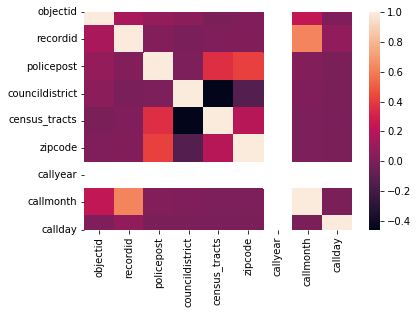

In [23]:
sns.heatmap(df.corr())
plt.show()

### Analysis of call description of incidents

In [24]:
df.description.value_counts()

Business Check      240531
COMMUNITY ENGAGE    136654
Hot Spot Check      123635
Traffic Stop         93438
DISORDERLY           86445
                     ...  
UNKNNW TROUBLE           1
DIABELED VEH             1
CLOSD CALL               1
ATTEMPTED THEFT          1
SITTING IN VEH           1
Name: description, Length: 2701, dtype: int64

As it is shown above, we have around 2701 described crimes or incidents reported through 911 calls.

Let's plot the top 10 described crimes or incidents reported through 911 calls.

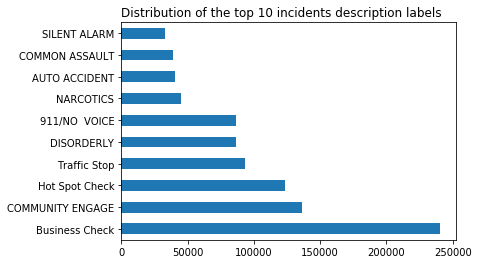

In [25]:
df.description.value_counts()[:10].plot(kind='barh')
plt.title('Distribution of the top 10 incidents description labels', loc='left')
plt.show()

### Analysis of 911 calls priority categories

In [26]:
df['priority'].value_counts()

Non-Emergency     786909
Low               279096
Medium            273827
High               89422
Emergency            241
Out of Service       177
Name: priority, dtype: int64

In [27]:
df.priority.value_counts(normalize=True)

Non-Emergency     0.550412
Low               0.195217
Medium            0.191531
High              0.062547
Emergency         0.000169
Out of Service    0.000124
Name: priority, dtype: float64

The Non-Emergency calls class occupies the majority of class with 55% which is more than half of other remaining 5 classes combined together.

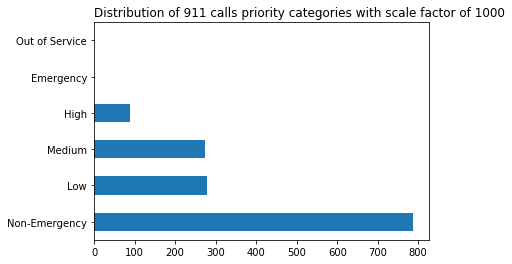

In [28]:
(df['priority'].value_counts()/1000).plot.barh()
plt.title('Distribution of 911 calls priority categories with scale factor of 1000', loc='left')
plt.show()

The call priority are categorized based on the level of emergency indication, such as low, medium to high as well as those marked emergency, non-emergency and out of service. Thus, I will be performing multiclass classification of the above 6 classes related to calls priority.

### Aggregate the number of calls taken per month

In [29]:
df.groupby('callmonthname')['priority'].count().sort_index()

callmonthname
April        133152
August       116822
December     127774
February     101119
January       98628
July         121281
June         121614
March        128867
May          132555
November     121054
October      118298
September    108508
Name: priority, dtype: int64

### Relationship between 911 calls priority categories and months in 2019

In [30]:
monthycalls = df.groupby('callmonth').priority.value_counts()
monthycalls.unstack()

priority,Emergency,High,Low,Medium,Non-Emergency,Out of Service
callmonth,,,,,,
1,16,7396,21658,22077,47461,20
2,14,6073,19466,20047,55510,9
3,20,7123,22761,22771,76172,20
4,32,7639,23839,24813,76823,6
5,28,8736,26254,25903,71625,9
6,20,8359,24753,23971,64496,15
7,25,8049,25980,24522,62681,24
8,16,8429,25102,23934,59327,14
9,19,8158,23184,22905,54227,15


According to this table, April had a high number of callss marked as Emergency calls, and December had a high number of Non-Emergency calls.

### Describe the relationship between 911 calls priority categories and months with a heatmap

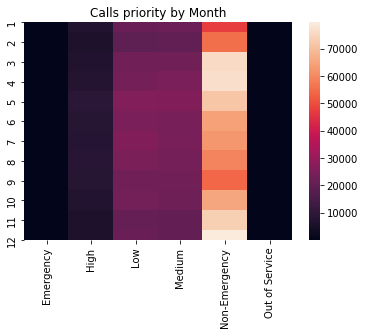

In [31]:
sns.heatmap(monthycalls.unstack())
plt.xlabel('')
plt.ylabel('')
plt.title('Calls priority by Month')
plt.show()

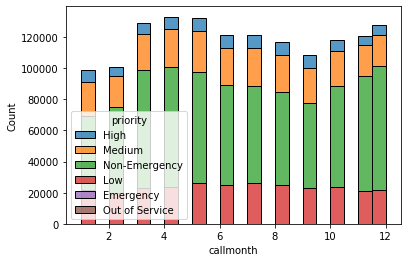

In [32]:
sns.histplot(binwidth=0.5, x="callmonth", hue="priority", data=df, stat="count", multiple="stack")

In 2019, the month of April had the most number of 911 calls. Whereas, the month of January had the least number of 911 calls.

### Plot trends of each priority 911 calls type monthly

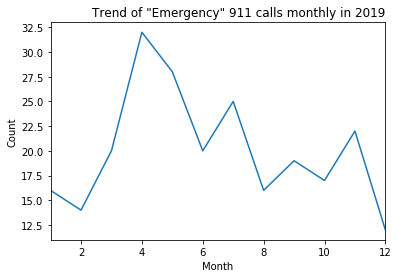

In [33]:
priority_type = 'Emergency'

df.query('priority==@priority_type').groupby('callmonth')['priority'].count().plot()
plt.title(f'Trend of "{priority_type}" 911 calls monthly in 2019', loc='right')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

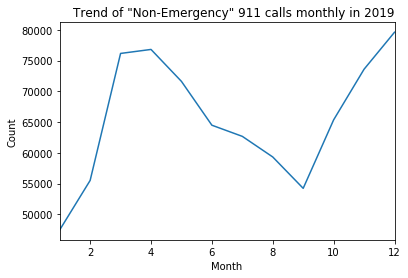

In [34]:
priority_type = 'Non-Emergency'

df.query('priority==@priority_type').groupby('callmonth')['priority'].count().plot()
plt.title(f'Trend of "{priority_type}" 911 calls monthly in 2019', loc='right')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

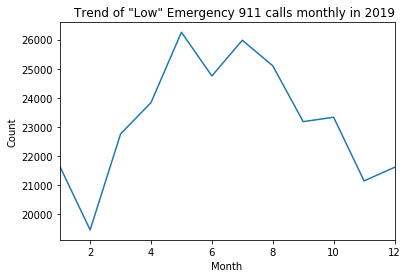

In [35]:
priority_type = 'Low'

df.query('priority==@priority_type').groupby('callmonth')['priority'].count().plot()
plt.title(f'Trend of "{priority_type}" Emergency 911 calls monthly in 2019', loc='right')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

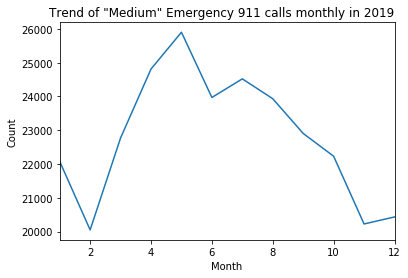

In [36]:
priority_type = 'Medium'

df.query('priority==@priority_type').groupby('callmonth')['priority'].count().plot()
plt.title(f'Trend of "{priority_type}" Emergency 911 calls monthly in 2019', loc='right')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

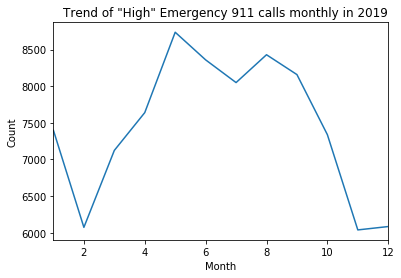

In [37]:
priority_type = 'High'

df.query('priority==@priority_type').groupby('callmonth')['priority'].count().plot()
plt.title(f'Trend of "{priority_type}" Emergency 911 calls monthly in 2019', loc='right')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

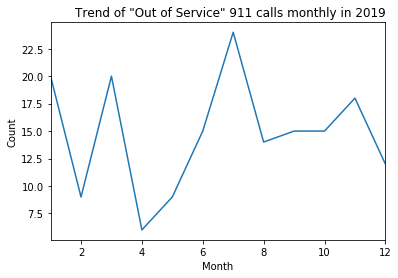

In [38]:
priority_type = 'Out of Service'

df.query('priority==@priority_type').groupby('callmonth')['priority'].count().plot()
plt.title(f'Trend of "{priority_type}" 911 calls monthly in 2019', loc='right')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## Modeling

### Numericals & Categorical columns/features

In [39]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
num_cols.remove('calldate')
num_cols

['objectid',
 'recordid',
 'policepost',
 'councildistrict',
 'census_tracts',
 'zipcode',
 'callyear',
 'callmonth',
 'callday']

In [40]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('priority')
cat_cols

['callkey',
 'district',
 'description',
 'callnumber',
 'incidentlocation',
 'neighborhood',
 'sheriffdistricts',
 'community_statistical_areas',
 'callmonthname',
 'calldayname']

In [41]:
cols = df.columns.tolist()
cols.remove('priority')
cols

['objectid',
 'recordid',
 'callkey',
 'district',
 'description',
 'callnumber',
 'incidentlocation',
 'neighborhood',
 'policepost',
 'councildistrict',
 'sheriffdistricts',
 'community_statistical_areas',
 'census_tracts',
 'zipcode',
 'calldate',
 'callyear',
 'callmonth',
 'callday',
 'callmonthname',
 'calldayname']

The above list of columns represent the inputs variables/feautures. The target variable is 'priority'.

### Partitionning training/testing sets

In [42]:
# split into 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def gen_splits(dataframe, features, target, test_pct=0.2):
    return train_test_split(dataframe[cols], dataframe[target], test_size=test_pct)

X_train, X_test, y_train, y_test = gen_splits(df, cols, 'priority')

### Creating pipelines with feature transformer and modeling

In [43]:
def pipe(model):
    pipeline = Pipeline([('t', transformer), ('m', model)])
    return pipeline

transformer = ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

### Logistic Regression model baseline

In [44]:
from sklearn.linear_model import LogisticRegression

lgr = pipe(LogisticRegression())
lgr.fit(X_train, y_train)
print('Logistic Regression Model fit')

Logistic Regression Model fit


In [45]:
print(f'Training accuracy score with Logistic Regression: {lgr.score(X_train, y_train):.2%}')
print(f'Testing accuracy score with Logistic Regression: {lgr.score(X_test, y_test):.2%}')

Training accuracy score with Logistic Regression: 98.12%
Testing accuracy score with Logistic Regression: 95.67%


In [46]:
from sklearn.metrics import classification_report

base = lgr.fit(X_train, y_train)
base_p = base.predict(X_test)

print(classification_report(y_test, base_p))

                precision    recall  f1-score   support

     Emergency       0.98      0.92      0.95        52
          High       0.85      0.84      0.84     17948
           Low       0.93      0.96      0.94     55848
        Medium       0.92      0.90      0.91     54676
 Non-Emergency       0.99      0.99      0.99    157375
Out of Service       0.00      0.00      0.00        36

      accuracy                           0.96    285935
     macro avg       0.78      0.77      0.77    285935
  weighted avg       0.96      0.96      0.96    285935



No need to plot ROC as we are performing multiclass classification.

### Exploration of different models hyperparameters & Grid Search

### Logistic Regression model with grid search cross-validation using 3 folds

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'m__class_weight': [None, 'balanced'], 
   'm__C':[0.1, 1]
  }
 ]

# Recall is the metric used to select the model as we are dealing with unbalanced classes.
# grid search cross-validation using 3 folds
lgr_gcv_results = GridSearchCV(estimator=lgr, param_grid=param_grid, cv=3)
lgr_gcv_results = lgr_gcv_results.fit(X_train, y_train)

# best model
print(lgr_gcv_results.best_estimator_)

Pipeline(memory=None,
         steps=[('t',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['callkey', 'district',
                                                   'description', 'callnumber',
                                                   'incidentlocation',
                                                   'neighborhood',
   

In [56]:
print(f'Validation Best Score: {lgr_gcv_results.best_score_:.2%}')

Validation Best Score: 95.69%


In [57]:
y_testp = lgr_gcv_results.predict(X_test)

print(classification_report(y_test, y_testp))

                precision    recall  f1-score   support

     Emergency       0.97      0.67      0.80        52
          High       0.86      0.83      0.85     17948
           Low       0.92      0.96      0.94     55848
        Medium       0.91      0.91      0.91     54676
 Non-Emergency       1.00      0.99      0.99    157375
Out of Service       0.00      0.00      0.00        36

      accuracy                           0.96    285935
     macro avg       0.78      0.73      0.75    285935
  weighted avg       0.96      0.96      0.96    285935



## Conclusion/Next steps

- Logistic regression is the most common classification model to use for this type of problem (multi labels/classes classification).

- I found the best model based on grid search

- The baseline model and the grid search achieved a high accuracy score close to 96 percent.

- Potential ways to improve performance and Areas for further exploration would be: Running other Decision Tree Algorithms and see if it has any impact as the dataset size is too large.

## References

1. https://github.com/appliedecon/data602-lectures
2. https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
3. https://data.baltimorecity.gov/datasets/baltimore::911-calls-for-service-2019/about
